**PUNTO 1**

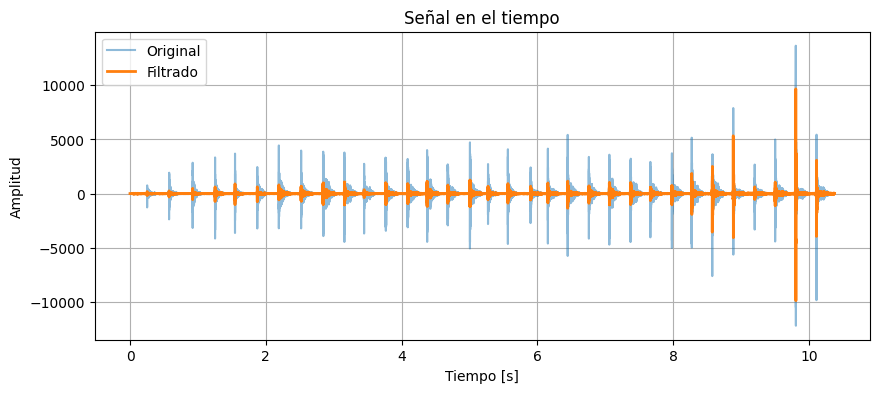

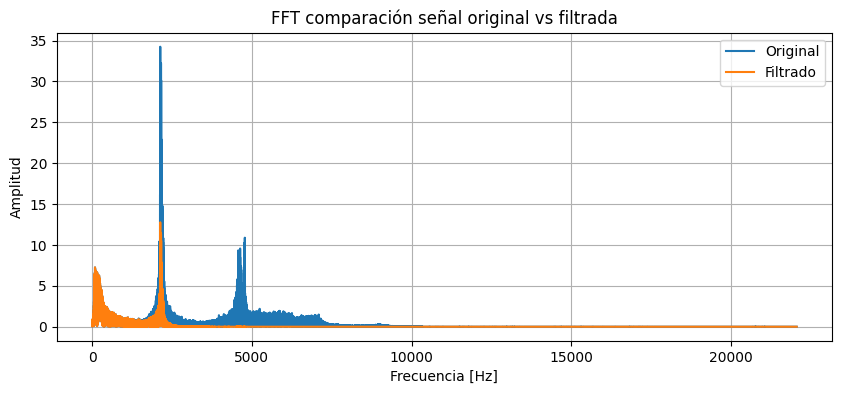

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq

fs, data = wavfile.read("sonido.wav")

if data.ndim > 1:
    data = data[:,0]

N = len(data)
t = np.arange(N) / fs

def filtro(x, fc, fs, orden=4):
    nyq = 0.5*fs
    normal = fc/nyq
    b, a = butter(orden, normal, btype="low")
    return filtfilt(b, a, x)

fc = 2000
data_f = filtro(data, fc, fs)

yf1 = fft(data)
yf2 = fft(data_f)

xf = fftfreq(N, 1/fs)[:N//2]
spec1 = 2.0/N * np.abs(yf1[:N//2])
spec2 = 2.0/N * np.abs(yf2[:N//2])

plt.figure(figsize=(10,4))
plt.plot(t, data, label="Original", alpha=0.5)
plt.plot(t, data_f, label="Filtrado", linewidth=2)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal en el tiempo")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(xf, spec1, label="Original")
plt.plot(xf, spec2, label="Filtrado")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.title("FFT comparación señal original vs filtrada")
plt.legend()
plt.grid(True)
plt.show()

**PUNTO 2**

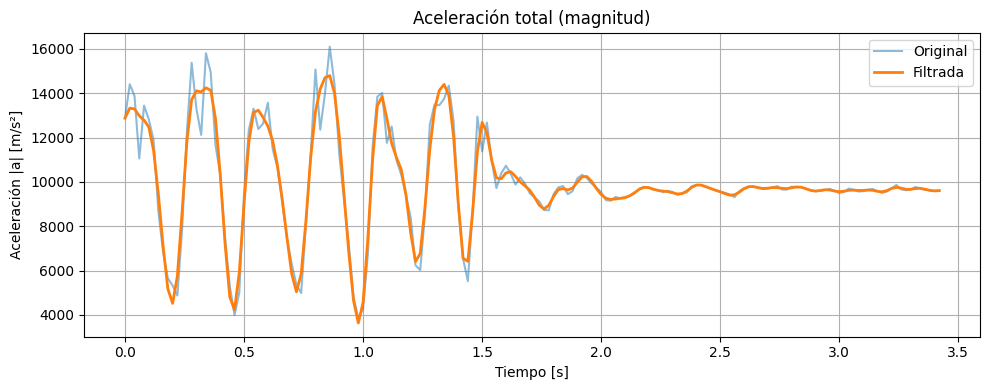

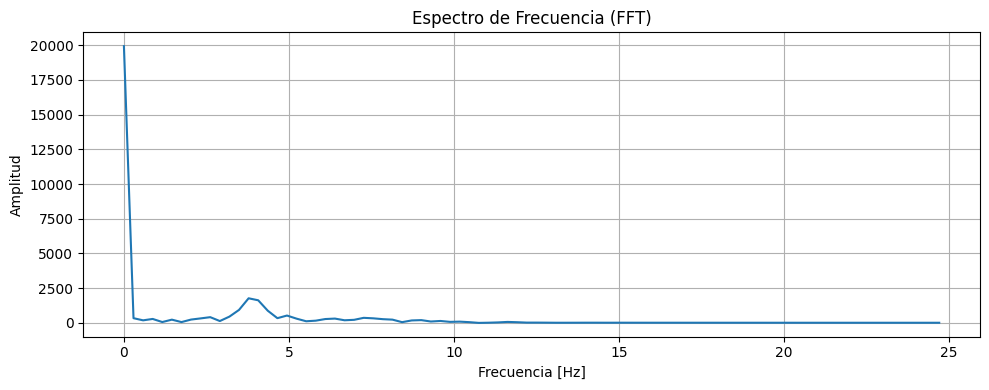

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq


datos = np.loadtxt("datos2.txt", delimiter=",")


x = datos[:, 0]
y = datos[:, 1]
z = datos[:, 2]


a = np.sqrt(x**2 + y**2 + z**2)


fs = 50.0  
N = len(a)
t = np.arange(N) / fs  


def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return filtfilt(b, a, data)

cutoff = 10  
a_filtrado = butter_lowpass_filter(a, cutoff, fs)


yf = fft(a_filtrado)
xf = fftfreq(N, 1/fs)[:N//2]     
spectrum = 2.0/N * np.abs(yf[:N//2])


plt.figure(figsize=(10,4))
plt.plot(t, a, label="Original", alpha=0.5)
plt.plot(t, a_filtrado, label="Filtrada", linewidth=2)
plt.xlabel("Tiempo [s]")
plt.ylabel("Aceleración |a| [m/s²]")
plt.title("Aceleración total (magnitud)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,4))
plt.plot(xf, spectrum)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.title("Espectro de Frecuencia (FFT)")
plt.grid(True)
plt.tight_layout()
plt.show()
